# ***Data Visualization Project : What makes a country happy?***






### ***Reminder of the Project Proposal*** 
The core business  problem  which  we  want  to address is what factors play a role in a country’s happiness.
The main driver of addressing this business problem is finding out what factors the happiest countries in the worldshare, but also what factors policy makers can work on in order to improve the happiness score of their nation. Within the context of our main business problem we also want to explore varied possibilities such as whether living in Northern countries is a guarantee of happiness and if a nation having a Democratic or Authoritarian regime can influence its happiness score.

#### Dataset used : World Happiness Report, from Kaggle

## ***Executive Summary*** 

- #### *Introduction*
- #### *Curation of the Dataset*


- ### **I/   Main World Happiness analysis**


- #### *Presentation of the World Map Happiness (a first Glance)*
- #### *Distribution of the explanatory variables*
- #### *Correlation of each variable between each other*
- #### *Pairwise comparison between variables*


- ### **II/   Comparison and anlaysis of World Happiness with new variables**


- #### *Relation between Happiness and Population*
- #### *GDP per capita with Happiness*
- #### *World Happiness Analysis*
- #### *Regional happiness analysis (violinplots and boxplots)*
- #### *Comparing World Happiness with World Democracy*
- #### *Correlation between happiness and democracy across the world*
- #### *Regime analysis* 


- ### **Conclusion**

## Introduction

### Business problem
The core business problem which we want to address is what factors play a role in a country’s happiness.
The main driver of addressing this business problem is finding out what factors the happiest countries in the world share, but also what factors policy makers can work on in order to improve the happiness of their nation.
Within the context of our main business problem we also want to explore varied possibilities such as whether living in Northern countries is a guarantee of happiness and if a nation having a Democratic or Authoritarian regime can influence its happiness score. We also want to find out if we had to pick a country to move to, based on happiness, which would it be.

### Datasets used
To obtain data on the factors that play a role in a country’s happiness we will start by using a dataset which contains information collected in The World Happiness Report, which is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. 

The data contains happiness scores and country rankings based on answers to the surveys. The columns following the happiness score estimate the extent to which each of six factors **– economic output, social support, life expectancy, freedom, absence of corruption, and generosity –** contribute to making life evaluations higher in each country than they are in a Dystopia, a hypothetical country who scores the lowest for each of the six factors.

The main specific datasets we will use are of the last five years (2015-2019) from Kaggle, being the most recent years with information available. However, the columns are often different between years, whether due to different variables being used (in order to explain one of the six factors mentioned above) or just by the introduction or removal of entirely new variables or factors.

Therefore, to go deeper into the second part of our analysis, we selected more data outside of our main dataset, which was obtained from the famous **- Economist Intelligence Unit-** curated here, and by merging outside data, namely containing democracy indexes, which contains democracy indexes, and a classification for each country (Full democracy, Flawed democracy, Hybrid regime and authoritarian regime). This index is made each year and is based on several factors such as **– electoral process and pluralism, functioning of government, political participation, political culture and civil liberties –**

As already noted, our happiness rankings are not based on any index of these six factors – the scores are instead based on individuals’ own assessments of their lives, as revealed by their answers to the Cantril ladder question that invites survey participants to imagine their current position on a ladder with steps numbered from 0 to 10, where the top represents the best possible and the bottom the worst possible life for themselves. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from plotly import subplots
from plotly.subplots import make_subplots

# Curation of the Dataset

### Curation of Main Data
<p>For the different years' dataframes, we find different columns being used. While the data for the years 2015 to 2017 shares most of the column names, which contain the explanatory variables for the country's ranks and happiness scores, there are significant differences on their content comparing to the years 2018 and 2019.</p>
<p>In order to maximize the usefulness of our data and to not lose value by having isolated variables which only exist for 1 or 2 years, we decided to organise the dataset based on the shared explanatory variables the World Hapiness Report gives importance to, such as: economic output, social support, life expectancy, freedom, absence of corruption, and generosity.</p>
<p>By default we will name columns identically to those in the years 2018 and 2019 as they correspond to the same parameter and represent the most updated data. For older years, such as 2017, some columns have been dropped.</p>


In [2]:
year_2015 = pd.read_csv("2015.csv")
year_2016 = pd.read_csv("2016.csv")
year_2017 = pd.read_csv("2017.csv")
year_2018 = pd.read_csv("2018.csv")
year_2019 = pd.read_csv("2019.csv")

countries = pd.read_csv('countries of the world.csv')

world_map = pd.read_csv('democracy_dataset_updated.csv')

In [3]:
default_columns = ["rank","nation","happiness_score","gdp_capita","life_expectancy",\
           "freedom_of_choice","generosity","perceived_corruption"]
#NOTE: YEAR 2018 AND 2019 WILL HAVE SOCIAL SUPPORT WHICH IS NOT INCLUDED IN DEFAULT_COLUMNS

In [4]:
year_2019.columns = ["rank","nation","happiness_score","gdp_capita","social_support","life_expectancy",\
           "freedom_of_choice","generosity","perceived_corruption"]
year_2019.head()

rank       nation  happiness_score  gdp_capita  social_support  \
0     1      Finland            7.769       1.340           1.587   
1     2      Denmark            7.600       1.383           1.573   
2     3       Norway            7.554       1.488           1.582   
3     4      Iceland            7.494       1.380           1.624   
4     5  Netherlands            7.488       1.396           1.522   

   life_expectancy  freedom_of_choice  generosity  perceived_corruption  
0            0.986              0.596       0.153                 0.393  
1            0.996              0.592       0.252                 0.410  
2            1.028              0.603       0.271                 0.341  
3            1.026              0.591       0.354                 0.118  
4            0.999              0.557       0.322                 0.298

In [5]:
year_2018.columns = ["rank","nation","happiness_score","gdp_capita","social_support","life_expectancy",\
           "freedom_of_choice","generosity","perceived_corruption"]
year_2018.head()

rank       nation  happiness_score  gdp_capita  social_support  \
0     1      Finland            7.632       1.305           1.592   
1     2       Norway            7.594       1.456           1.582   
2     3      Denmark            7.555       1.351           1.590   
3     4      Iceland            7.495       1.343           1.644   
4     5  Switzerland            7.487       1.420           1.549   

   life_expectancy  freedom_of_choice  generosity  perceived_corruption  
0            0.874              0.681       0.202                 0.393  
1            0.861              0.686       0.286                 0.340  
2            0.868              0.683       0.284                 0.408  
3            0.914              0.677       0.353                 0.138  
4            0.927              0.660       0.256                 0.357

In [6]:
year_2017.drop(["Whisker.high","Whisker.low","Family","Dystopia.Residual"],axis=1,inplace=True)

year_2017.columns = ["nation","rank","happiness_score","gdp_capita","life_expectancy",\
           "freedom_of_choice","generosity","perceived_corruption"]

year_2017.head()

#inplace is true, don't run this cell twice

nation  rank  happiness_score  gdp_capita  life_expectancy  \
0       Norway     1            7.537    1.616463         0.796667   
1      Denmark     2            7.522    1.482383         0.792566   
2      Iceland     3            7.504    1.480633         0.833552   
3  Switzerland     4            7.494    1.564980         0.858131   
4      Finland     5            7.469    1.443572         0.809158   

   freedom_of_choice  generosity  perceived_corruption  
0           0.635423    0.362012              0.315964  
1           0.626007    0.355280              0.400770  
2           0.627163    0.475540              0.153527  
3           0.620071    0.290549              0.367007  
4           0.617951    0.245483              0.382612

In [7]:
year_2016.drop(["Region","Lower Confidence Interval","Upper Confidence Interval","Family","Dystopia Residual"],\
               axis=1,inplace=True)
year_2016.columns = ["nation","rank","happiness_score","gdp_capita","life_expectancy",\
           "freedom_of_choice","generosity","perceived_corruption"]

year_2016.head()

#inplace is true, don't run this cell twice

nation  rank  happiness_score  gdp_capita  life_expectancy  \
0      Denmark     1            7.526     1.44178          0.79504   
1  Switzerland     2            7.509     1.52733          0.86303   
2      Iceland     3            7.501     1.42666          0.86733   
3       Norway     4            7.498     1.57744          0.79579   
4      Finland     5            7.413     1.40598          0.81091   

   freedom_of_choice  generosity  perceived_corruption  
0            0.57941     0.44453               0.36171  
1            0.58557     0.41203               0.28083  
2            0.56624     0.14975               0.47678  
3            0.59609     0.35776               0.37895  
4            0.57104     0.41004               0.25492

In [8]:
year_2015.drop(["Region","Standard Error","Family","Dystopia Residual"],axis=1,inplace=True)

year_2015.columns = ["nation","rank","happiness_score","gdp_capita","life_expectancy",\
           "freedom_of_choice","generosity","perceived_corruption"]

year_2015.head()

nation  rank  happiness_score  gdp_capita  life_expectancy  \
0  Switzerland     1            7.587     1.39651          0.94143   
1      Iceland     2            7.561     1.30232          0.94784   
2      Denmark     3            7.527     1.32548          0.87464   
3       Norway     4            7.522     1.45900          0.88521   
4       Canada     5            7.427     1.32629          0.90563   

   freedom_of_choice  generosity  perceived_corruption  
0            0.66557     0.41978               0.29678  
1            0.62877     0.14145               0.43630  
2            0.64938     0.48357               0.34139  
3            0.66973     0.36503               0.34699  
4            0.63297     0.32957               0.45811

#### The columns we want to analyze are given by default_columns:
- rank: Rank in terms of happiness scores
- nation: Country
- happiness_score: Happiness Score
- gdp_capita: Gross domestic product in per capita terms
- life_expectancy: Healthy life expectancy which are the number of years you expect someone to live when born in a given country
- freedom_of_choice: Freedom to take free choices
- generosity: To what extent people are generous
- perceived_corruption: How corrupt people perceive their government to be

In [9]:
year_2015 = year_2015.loc[:,default_columns]
year_2016 = year_2016.loc[:,default_columns]
year_2017 = year_2017.loc[:,default_columns]
year_2018 = year_2018.loc[:,default_columns]
year_2019 = year_2019.loc[:,default_columns]

#add year

year_2015["year"] = 2015
year_2016["year"] = 2016
year_2017["year"] = 2017
year_2018["year"] = 2018
year_2019["year"] = 2019

#concatenate data under a single dataframe

df = pd.concat([year_2015,year_2016,year_2017,year_2018,year_2019]).copy()

df.head(10)

rank       nation  happiness_score  gdp_capita  life_expectancy  \
0     1  Switzerland            7.587     1.39651          0.94143   
1     2      Iceland            7.561     1.30232          0.94784   
2     3      Denmark            7.527     1.32548          0.87464   
3     4       Norway            7.522     1.45900          0.88521   
4     5       Canada            7.427     1.32629          0.90563   
5     6      Finland            7.406     1.29025          0.88911   
6     7  Netherlands            7.378     1.32944          0.89284   
7     8       Sweden            7.364     1.33171          0.91087   
8     9  New Zealand            7.286     1.25018          0.90837   
9    10    Australia            7.284     1.33358          0.93156   

   freedom_of_choice  generosity  perceived_corruption  year  
0            0.66557     0.41978               0.29678  2015  
1            0.62877     0.14145               0.43630  2015  
2            0.64938     0.48357               0.34139  2015  
3            0.66973     0.36503               0.34699  2015  
4            0.63297     0.32957               0.45811  2015  
5            0.64169     0.41372               0.23351  2015  
6            0.61576     0.31814               0.47610  2015  
7            0.65980     0.43844               0.36262  2015  
8            0.63938     0.42922               0.47501  2015  
9            0.65124     0.35637               0.43562  2015

By precaution we will drop NaN values in our data, as they may lead us to draw wrong conlusions.

In [10]:
df.dropna(inplace=True)

In [11]:
df

rank                    nation  happiness_score  gdp_capita  \
0       1               Switzerland            7.587     1.39651   
1       2                   Iceland            7.561     1.30232   
2       3                   Denmark            7.527     1.32548   
3       4                    Norway            7.522     1.45900   
4       5                    Canada            7.427     1.32629   
..    ...                       ...              ...         ...   
151   152                    Rwanda            3.334     0.35900   
152   153                  Tanzania            3.231     0.47600   
153   154               Afghanistan            3.203     0.35000   
154   155  Central African Republic            3.083     0.02600   
155   156               South Sudan            2.853     0.30600   

     life_expectancy  freedom_of_choice  generosity  perceived_corruption  \
0            0.94143            0.66557     0.41978               0.29678   
1            0.94784            0.62877     0.14145               0.43630   
2            0.87464            0.64938     0.48357               0.34139   
3            0.88521            0.66973     0.36503               0.34699   
4            0.90563            0.63297     0.32957               0.45811   
..               ...                ...         ...                   ...   
151          0.61400            0.55500     0.21700               0.41100   
152          0.49900            0.41700     0.27600               0.14700   
153          0.36100            0.00000     0.15800               0.02500   
154          0.10500            0.22500     0.23500               0.03500   
155          0.29500            0.01000     0.20200               0.09100   

     year  
0    2015  
1    2015  
2    2015  
3    2015  
4    2015  
..    ...  
151  2019  
152  2019  
153  2019  
154  2019  
155  2019  

[781 rows x 9 columns]

- # Presentation of the Happiness World Map (a First Glance)
With the map presented, we can see how happiness is distributed by country

In [12]:
fig = go.Figure(data=go.Choropleth(
    locations = world_map['iso_a3'],
    z = world_map['Score'],
    text = world_map['Country'],
    colorscale = 'geyser',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Happiness Score',
))

fig.update_layout(
    title_text='African and Asian countries seem less happy than others ',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )]
)

#fig.write_image("worldmaphappiness.png",width=1920,height=1080)
fig.show()

The figure above shows how happy different people from 156 different countries perceive themselves to be. We'll start by exploring how the explanatory variables used to explain hapiness scores in the World Happiness Report are distributed given the total number of countries involved, and then explore how correlated these variables are with happiness scores. At first glance, happiness is higher in west Europe, north America and Oceania, followed by South America and then Asia. Other than Saudi Arabia, the middle east scores the poorest in happiness, only followed by Africa.

_Technical Note: Despite the cantril ladder being used, for which the values obtained in theory can be between 0 and 10, our colorscale goes only from slightly below 3 to slightly below 8 as all countries are within these values and it helps make the visualisation of differences between countries easier._

## Quartiles
For later use, we added two columns which contain the separated happiness score and GDP score into quartiles which will be used in order to produce a pairwise comparison between variables, helping us to simplify comparison and analysis.

In [13]:
df['Quartiles_by_Happiness'] =  pd.qcut(df['happiness_score'], 4, labels = ['Low (percentil 25)','Mid (percentil 50)','Mid-High (percentil 75)','High (percentil 100)'])
df['Quartiles_by_gdp_capita'] = pd.qcut(df['gdp_capita'], 4, labels = ['Low_gdp (percentil 25)','Mid_gdp (percentil 50)','Mid-High_gdp (percentil 75)','High_gdp (percentil 100)'])

In [14]:
df.head()

rank       nation  happiness_score  gdp_capita  life_expectancy  \
0     1  Switzerland            7.587     1.39651          0.94143   
1     2      Iceland            7.561     1.30232          0.94784   
2     3      Denmark            7.527     1.32548          0.87464   
3     4       Norway            7.522     1.45900          0.88521   
4     5       Canada            7.427     1.32629          0.90563   

   freedom_of_choice  generosity  perceived_corruption  year  \
0            0.66557     0.41978               0.29678  2015   
1            0.62877     0.14145               0.43630  2015   
2            0.64938     0.48357               0.34139  2015   
3            0.66973     0.36503               0.34699  2015   
4            0.63297     0.32957               0.45811  2015   

  Quartiles_by_Happiness   Quartiles_by_gdp_capita  
0   High (percentil 100)  High_gdp (percentil 100)  
1   High (percentil 100)  High_gdp (percentil 100)  
2   High (percentil 100)  High_gdp (percentil 100)  
3   High (percentil 100)  High_gdp (percentil 100)  
4   High (percentil 100)  High_gdp (percentil 100)

- # Distribution of the explanatory variables

## The histograms below are an approximate representation of the distribution of the explanatory variables (the factors that explain happiness scores).

In [15]:
# First Year Displayed
year = 2015

# Relevant Columns
relevant_columns = ['happiness_score','gdp_capita','life_expectancy','freedom_of_choice','generosity','perceived_corruption']

x_axis = []
for i in range(len(relevant_columns)):
    x_axis.append(df.loc[df['year']==int(year)][relevant_columns[i]])

hist0 = go.Histogram(
    x=x_axis[0],
    opacity=0.6,
    name='happiness_score',
    marker={'color':'green'}
)
hist1 = go.Histogram(
    x=x_axis[1],
    opacity=0.6,
    name='gdp_capita',
    marker={'color':'blue'}
)

hist2 = go.Histogram(
    x=x_axis[2],
    opacity=0.6,
    name='life_expectancy',
    marker={'color':'red'}
)
hist3 = go.Histogram(
    x=x_axis[3],
    opacity=0.6,
    name='freedom_of_choice',
    marker={'color':'maroon'}
)
hist4 = go.Histogram(
    x=x_axis[4],
    opacity=0.6,
    name='generosity',
    marker={'color':'darkorchid'}
)
hist5 = go.Histogram(
    x=x_axis[5],
    opacity=0.6,
    name='perceived_corruption',
    marker={'color':'orange'}
)

fig2 = subplots.make_subplots(rows=3,
                    cols=2,
                    #print_grid=False,
                    vertical_spacing=0.15,
                    horizontal_spacing=0.095,
                    #x_title='Your master x-title',
                    y_title='Number of Countries',
                    subplot_titles=('Happiness score','GDP per Capita','Life expectancy',
                                    'Freedom of choice','Generosity','Perceived Corruption'))

fig2.append_trace(hist0, 1, 1)
fig2.append_trace(hist1, 1, 2)
fig2.append_trace(hist2, 2, 1)
fig2.append_trace(hist3, 2, 2)
fig2.append_trace(hist4, 3, 1)
fig2.append_trace(hist5, 3, 2)

fig2.update_layout(#yaxis_title='# Countries',
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="2015",
                     method="update",
                     args=[{'x':[df.loc[df['year']==2015][relevant_columns[i]] for i in range(len(relevant_columns))],
                             'type':'histogram',
                             "title": "Year 2015"}]),
                dict(label="2016",
                     method="update",
                     args=[{'x':[df.loc[df['year']==2016][relevant_columns[i]] for i in range(len(relevant_columns))],
                             'type':'histogram',
                             "title": "Year 2016"}]),
                dict(label="2017",
                     method="update",
                     args=[{'x':[df.loc[df['year']==2017][relevant_columns[i]] for i in range(len(relevant_columns))],
                             'type':'histogram',
                             "title": "Year 2017"}]),
                dict(label="2018",
                     method="update",
                     args=[{'x':[df.loc[df['year']==2018][relevant_columns[i]] for i in range(len(relevant_columns))],
                             'type':'histogram',
                             "title": "Year 2018"}]),
                dict(label="2019",
                     method="restyle",
                     args=[{'x':[df.loc[df['year']==2019][relevant_columns[i]] for i in range(len(relevant_columns))],
                             'type':'histogram'},
                             {"title": "Year 2019"}]),
            ]),
        )
    ])

# Set title
fig2.update_layout(title_text="Different Variable Distributions by Year")
for i in range(len(relevant_columns)):
    fig2.layout.annotations[i]["font"] = {'size': 14}

fig2.show()

### Happiness Score
Seems to be normally distributed with mean around Score level of 5.

Throughout the years, from 2015 to 2019, happiness seems to have slightly increased for countries with initial low levels, with an increase in concentration of the density around the mean.

### GDP per Capita
There seems to be a shift in density rightwards (away from 0), and towards higher levels of GDP per capita.

### Life Expectancy
This indicator has some significant variations throughout the years, with the concentration between 2016 to 2018 moving towards the left (the median decreases) but coming back to levels similar to 2015 in the year 2019, albeith now with a higher average given the thinner tail on the left (towards 0)

### Freedom of Choice
Freedom of choice indicator seems to be decreasing from 2015 to 2019, with the density moving more towards the left.

### Generosity
This subjective indicator seems to have improve from 2015 to 2019 with density of values increasing and shifting towards higher levels of the indicator.

### Perceived Corruption
Perceived corruption has been declining throughout the years, moving closer to 0 when comparing 2015 with 2019.

- # Correlation of each variable between each other
## Correlation Matrix
By constructing a correlation matrix, we aim to understand how each variable relates with each other. This will give us an idea of where to follow with our analysis of specific factors that have a higher impact on Happiness Scores. 

In [16]:
relevant_columns = ['happiness_score','gdp_capita','life_expectancy','freedom_of_choice','generosity','perceived_corruption']
df_rev = df[relevant_columns]
corr_val = df_rev.corr()

Text(0.5, 1.0, 'GDP per capita and Life Expectancy \n have the strongest correlation with Happiness Score \n ')

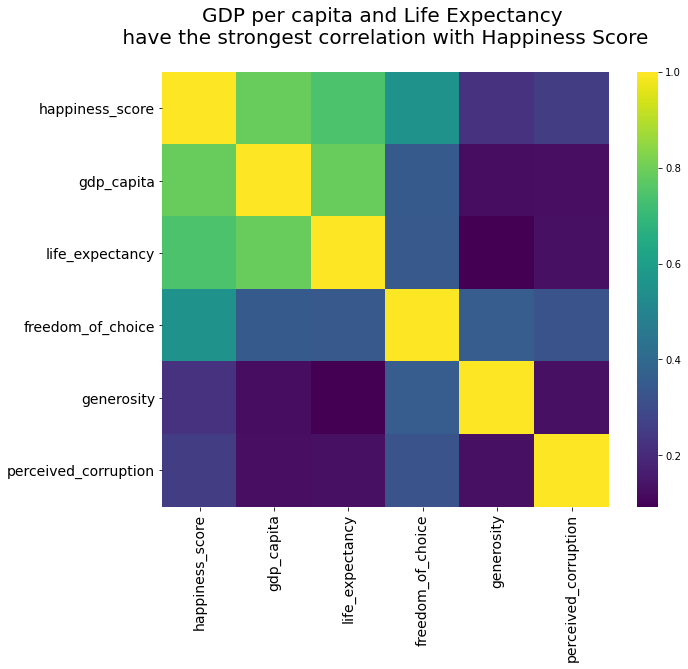

In [17]:
# First, get a color map -> a function that converts numbers to colors
c_palette = sns.color_palette("viridis", as_cmap=True)

# then initialize the figure and subplots
fig, ax= plt.subplots(1,1,figsize=(10,8))

# use a heatmap with the correlation matrix, the colormap, and the axis
sns.heatmap(corr_val, cmap=c_palette, ax=ax)

# just fix the fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# add title
plt.title("GDP per capita and Life Expectancy \n have the strongest correlation with Happiness Score \n ", fontsize = 20)





### _"As expected, happiness score shows a high positive relation with GDP per capita and Life expectancy"_

It is clear that, as expected, happiness score shows a high positive relation with GDP per capita and Life expectancy. 
These are followed by freedom of choice which shows an interesting correlation with happiness score and should be interesting for a closer look. 

However, the correlation matrix does not allow us to make many interpretations on the relevance of each variable, allowing only for us to start paying attention to specific and possibly interesting relations between variables. 

- # Pairwise Comparison Between Variables
Having identified which are the variables that seem to be more correlated with the Happiness score we perform a Pairwise Comparison between variables to see how they are actually distributed and, using Quartiles by Happiness, how do the percentiles mix across the different scatter plots.

Text(0.5, 0.98, 'Comparison between variables and distribution across Happiness Quartile')

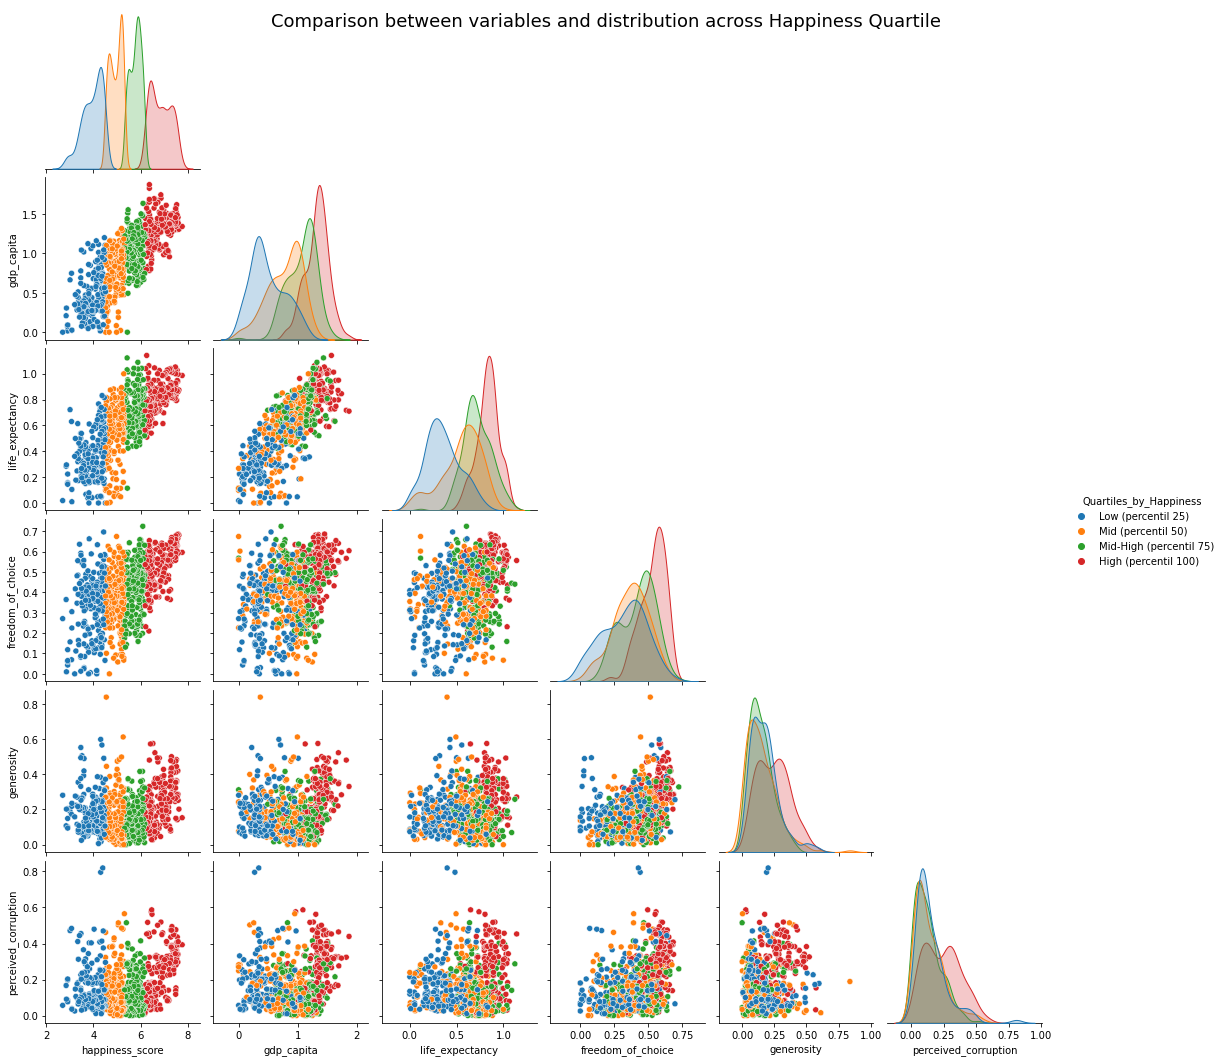

In [18]:
g = sns.pairplot(data=df.drop(['year','rank'],axis=1), hue='Quartiles_by_Happiness', 
             palette=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='kde', 
             height=2.5, aspect=1, corner=True, dropna=False, plot_kws=None, diag_kws=None, 
             grid_kws=None
            )
g.fig.suptitle("Comparison between variables and distribution across Happiness Quartile", y=0.98, fontsize = 18)

### _"GDP per capita and Life Expectancy are highly correlated with Happiness Scores and show a constant variance"_
GDP per capita, and Life expectancy are highly correlated with Happiness Score, and seems to have a relatively constant variance (Homoskedastic)

However, both GDP per capita and Life expectancy, but a stronger presence on Life Expectancy, seem to have for the Mid and Low percentiles of Happiness, a wider variance, that is:

For the same values of happiness, there are very different instances of Life expectancy and GDP per capita.
### _"For low levels of Happiness there is a clear increase in variance for all important measures, namely Freedom of choice and Life expectancy"_
This would suggest that although these parameters have a strong correlation with Happiness on higher levels, low levels of Happiness have different factors that need to be taken into account

The perceived Freedom of Choice indicator is an extreme example for what is depicted above, being a clear Heteroskedastic distribution
### _"Freedom of Choice seems to be extremely necessary for the highest levels of Happiness although it has a low correlation for lower Happiness percentiles"_
It seems to be the case that for low levels of Happiness Freedom of choice is not a determinant component, however, there's a strong suggestion for its importance as happiness scores increase

All Countries in the Highest percentile have high levels of Freedom of choice with seemingly, no outliers

The remaining factors: Generosity and Perceived Corruption don't seem to have any correlation with happiness scores.
### _"For higher levels of Happiness (High percentile - red) GDP per capita, Life expectancy and Freedom of Choice seem to be determinant factors"_
Looking at the diagonal KDE distributions we can observe that:

GDP per capita, Life expectancy and Freedom of Choice all have the Highest percentile of Happiness Scores Countries with a skewed and peaked distribution to the right of the graph.

This implies that these are at least determinant factors for high levels of happiness

By opposition, Generosity and Perceived Corruption have all very overlapping distributions of the different Quartiles, further suggestion a low correlation and importance as determinant factor

Text(0.5, 0.98, 'Relationship between determinant factors and distribution across Happiness Quartile')

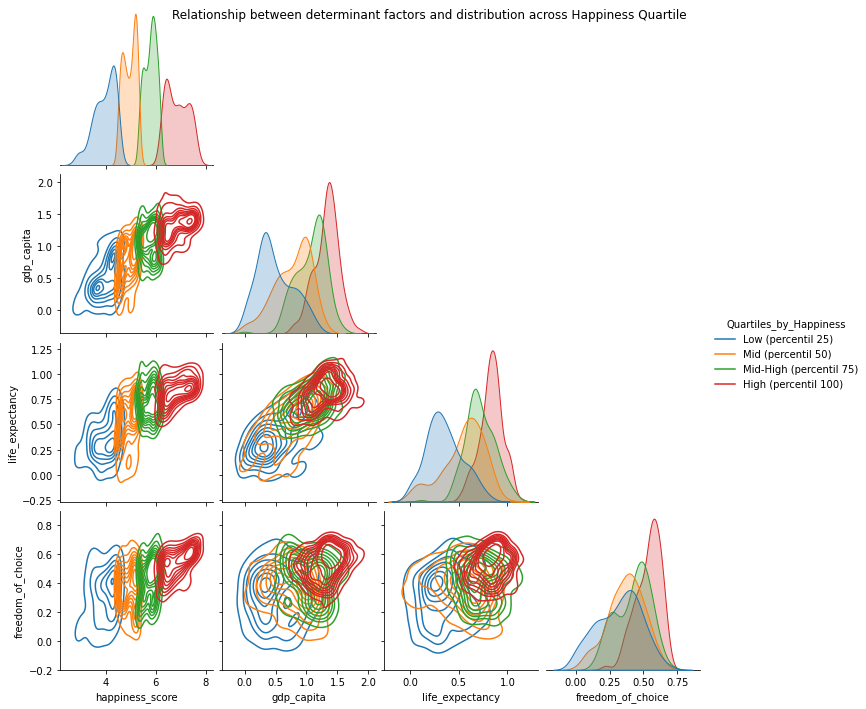

In [19]:
a = sns.pairplot(data=df.drop(['year','rank'],axis=1), hue='Quartiles_by_Happiness', 
             palette=None, x_vars=['happiness_score','gdp_capita','life_expectancy','freedom_of_choice'], 
             y_vars=['happiness_score','gdp_capita','life_expectancy','freedom_of_choice'], 
             kind='kde', diag_kind='kde', height=2.5, aspect=1, corner=True, 
             dropna=False, plot_kws=None, diag_kws=None, 
             grid_kws=None, size=None
            )
a.fig.suptitle("Relationship between determinant factors and distribution across Happiness Quartile", y=0.98, fontsize = 12)

### _"For high levels of Happiness Score, Freedom of Choice, Life Expectancy and GDP per Capita are very concentrated"_
Taking a closer look to the most determinant variables (GDP per capita, Life expectancy and Freedom of Choice), with a focus on densities accross the quartiles, it is possible to confirm the previous insights.

## Adding a new column to the dataset
To analyse where most world population is in terms of happiness score, we added a complementary dataset, which contains the population for each country.

In [20]:
countries.drop([ 'Region', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'], axis=1, inplace=True)

In [21]:
countries.rename(columns = {"Country": "nation"}, inplace=True)

In [22]:
#When we looked at the new dataset, the name of the country had a space. 
#In order to merge the two datasets, we computed this code.
nation = [countries.iloc[i,0][:-1] for i in range(0, len(countries))]

In [23]:
final = pd.DataFrame({"nation": nation, "Population": countries["Population"]})

In [24]:
year_2019_pop = year_2019.merge(final, how='right', on = "nation")
year_2018_pop = year_2018.merge(final, how='right', on = "nation")
year_2017_pop = year_2017.merge(final, how='right', on = "nation")
year_2016_pop = year_2016.merge(final, how='right', on = "nation")
year_2015_pop = year_2015.merge(final, how='right', on = "nation")

In [25]:
year_2019_pop.dropna(axis=0, inplace = True)
year_2018_pop.dropna(axis=0, inplace = True)
year_2017_pop.dropna(axis=0, inplace = True)
year_2016_pop.dropna(axis=0, inplace = True)
year_2015_pop.dropna(axis=0, inplace = True)

In [26]:
year_2018_pop

rank       nation  happiness_score  gdp_capita  life_expectancy  \
0    145.0  Afghanistan            3.632       0.332            0.255   
1    112.0      Albania            4.586       0.916            0.790   
2     84.0      Algeria            5.295       0.979            0.687   
5    142.0       Angola            3.795       0.730            0.269   
8     29.0    Argentina            6.388       1.073            0.744   
..     ...          ...              ...         ...              ...   
218  102.0    Venezuela            4.806       0.996            0.657   
219   95.0      Vietnam            5.103       0.715            0.702   
224  152.0        Yemen            3.355       0.442            0.343   
225  125.0       Zambia            4.377       0.562            0.295   
226  144.0     Zimbabwe            3.692       0.357            0.248   

     freedom_of_choice  generosity  perceived_corruption    year  Population  
0                0.085       0.191                 0.036  2018.0    31056997  
1                0.419       0.149                 0.032  2018.0     3581655  
2                0.077       0.055                 0.135  2018.0    32930091  
5                0.000       0.079                 0.061  2018.0    12127071  
8                0.570       0.062                 0.054  2018.0    39921833  
..                 ...         ...                   ...     ...         ...  
218              0.133       0.056                 0.052  2018.0    25730435  
219              0.618       0.177                 0.079  2018.0    84402966  
224              0.244       0.083                 0.064  2018.0    21456188  
225              0.503       0.221                 0.082  2018.0    11502010  
226              0.406       0.132                 0.099  2018.0    12236805  

[143 rows x 10 columns]

In [27]:
dfinal = pd.concat([year_2015_pop,year_2016_pop,year_2017_pop,year_2018_pop,year_2019_pop]).copy()

dfinal.head(10)

rank       nation  happiness_score  gdp_capita  life_expectancy  \
0   153.0  Afghanistan            3.575     0.31982          0.30335   
1    95.0      Albania            4.959     0.87867          0.81325   
2    68.0      Algeria            5.605     0.93929          0.61766   
5   137.0       Angola            4.033     0.75778          0.16683   
8    30.0    Argentina            6.574     1.05351          0.78723   
9   127.0      Armenia            4.350     0.76821          0.72990   
11   10.0    Australia            7.284     1.33358          0.93156   
12   13.0      Austria            7.200     1.33723          0.89042   
13   80.0   Azerbaijan            5.212     1.02389          0.64045   
15   49.0      Bahrain            5.960     1.32376          0.74716   

    freedom_of_choice  generosity  perceived_corruption    year  Population  
0             0.23414     0.09719               0.36510  2015.0    31056997  
1             0.35733     0.06413               0.14272  2015.0     3581655  
2             0.28579     0.17383               0.07822  2015.0    32930091  
5             0.10384     0.07122               0.12344  2015.0    12127071  
8             0.44974     0.08484               0.11451  2015.0    39921833  
9             0.19847     0.03900               0.07855  2015.0     2976372  
11            0.65124     0.35637               0.43562  2015.0    20264082  
12            0.62433     0.18676               0.33088  2015.0     8192880  
13            0.37030     0.16065               0.07799  2015.0     7961619  
15            0.45492     0.30600               0.17362  2015.0      698585

In [28]:
dfinal['Quartiles_by_Population'] =  pd.qcut(dfinal['Population'], 4, labels = ['Low','Mid','Mid-Top','Top'])
dfinal['Quartiles_by_gdp_capita'] = pd.qcut(dfinal['gdp_capita'], 4, labels = ['Low_gdp (percentil 25)','Mid_gdp (percentil 50)','Mid-High_gdp (percentil 75)','High_gdp (percentil 100)'])

In [29]:
dfinal.head(10)

rank       nation  happiness_score  gdp_capita  life_expectancy  \
0   153.0  Afghanistan            3.575     0.31982          0.30335   
1    95.0      Albania            4.959     0.87867          0.81325   
2    68.0      Algeria            5.605     0.93929          0.61766   
5   137.0       Angola            4.033     0.75778          0.16683   
8    30.0    Argentina            6.574     1.05351          0.78723   
9   127.0      Armenia            4.350     0.76821          0.72990   
11   10.0    Australia            7.284     1.33358          0.93156   
12   13.0      Austria            7.200     1.33723          0.89042   
13   80.0   Azerbaijan            5.212     1.02389          0.64045   
15   49.0      Bahrain            5.960     1.32376          0.74716   

    freedom_of_choice  generosity  perceived_corruption    year  Population  \
0             0.23414     0.09719               0.36510  2015.0    31056997   
1             0.35733     0.06413               0.14272  2015.0     3581655   
2             0.28579     0.17383               0.07822  2015.0    32930091   
5             0.10384     0.07122               0.12344  2015.0    12127071   
8             0.44974     0.08484               0.11451  2015.0    39921833   
9             0.19847     0.03900               0.07855  2015.0     2976372   
11            0.65124     0.35637               0.43562  2015.0    20264082   
12            0.62433     0.18676               0.33088  2015.0     8192880   
13            0.37030     0.16065               0.07799  2015.0     7961619   
15            0.45492     0.30600               0.17362  2015.0      698585   

   Quartiles_by_Population      Quartiles_by_gdp_capita  
0                      Top       Low_gdp (percentil 25)  
1                      Low       Mid_gdp (percentil 50)  
2                      Top       Mid_gdp (percentil 50)  
5                  Mid-Top       Mid_gdp (percentil 50)  
8                      Top  Mid-High_gdp (percentil 75)  
9                      Low       Mid_gdp (percentil 50)  
11                 Mid-Top     High_gdp (percentil 100)  
12                     Mid     High_gdp (percentil 100)  
13                     Mid  Mid-High_gdp (percentil 75)  
15                     Low     High_gdp (percentil 100)

- # Relation between Happiness and Population

The graph below allows us to check the evolution of each country's happiness score against GDP from 2015 to 2019.
By using population as bubble size we expect to understand where most people live, in terms of happiness score, and observe how countries and their score evolve throughout the years with a (normally) increasing indicator of GDP per capita.
### _"We want to evaluate if GDP per capita relevance leads to an increase of happiness score"_

> We strongly invite you to change and explore the evolution manually by choosing the year to be previewed.

In [30]:
px.scatter(dfinal, x="gdp_capita", 
           y="happiness_score", 
           animation_frame="year", 
           color="Quartiles_by_gdp_capita",
           animation_group = "nation", 
           size="Population", 
           hover_name = "nation",
           title = "World population is mostly concentrated around a happiness score of 5 (from 0-10)",
           labels={"gdp_capita": "GDP Score",
                   "happiness_score":"Happiness Score",
                   "Quartiles_by_gdp_capita":"Quartiles by GDP Score"}
          )

### _"Throughout most years, GDP is increasing its relevance on explaining happiness score"_

With this interactive graph, we can also see that most of the world population has a happiness score of 5. 

We can also see that in the years that GDP shifts to the right. It means that it is increasing its relevance on explaining happiness score in each country. Clearly it helps us to improve our reasoning on GDP affecting happiness. 

#### Is where most people live in, where we should decide to live?

With this interactive graph, we can also see that over half of the world population has a happiness score of above 5. 

#### China and India

A more clear idea can be seen with an intersting analysis regarding where most of the population lives, China and India. Even though their GDP is increasing - we also see a change in the percentil levels of China - their happiness remains the same and India's happiness even decreases.

Choosing the place to live taking into consideration where most people live should not be the best decision.

#### Throughout the years

Clearly, GDP is a good measure to explain if a country is happy, but along the years countries seem to maintain their levels of happiness. 
Maybe there could be a clearer way to see if there is a country improving its happiness.

In [31]:
#Below we add data to the year 2019 regarding democracy scores, regions and ISO codes in order to plot world maps
year_2019.head()

rank       nation  happiness_score  gdp_capita  life_expectancy  \
0     1      Finland            7.769       1.340            0.986   
1     2      Denmark            7.600       1.383            0.996   
2     3       Norway            7.554       1.488            1.028   
3     4      Iceland            7.494       1.380            1.026   
4     5  Netherlands            7.488       1.396            0.999   

   freedom_of_choice  generosity  perceived_corruption  year  
0              0.596       0.153                 0.393  2019  
1              0.592       0.252                 0.410  2019  
2              0.603       0.271                 0.341  2019  
3              0.591       0.354                 0.118  2019  
4              0.557       0.322                 0.298  2019

In [32]:
world_map.head()

Column1  Overall rank      Country  Score         Region iso_a3  \
0      153           154  Afghanistan  3.203           Asia    AFG   
1      106           107      Albania  4.719         Europe    ALB   
2       87            88      Algeria  5.211         Africa    DZA   
3       46            47    Argentina  6.086  South America    ARG   
4      115           116      Armenia  4.559           Asia    ARM   

   democracy index  regime  
0             2.85       1  
1             5.89       2  
2             4.01       2  
3             7.03       3  
4             5.54       2

In [33]:
dem_nation = world_map.rename(columns = {"Overall rank": "rank"})

In [34]:
gdp_map = dem_nation.merge(year_2019, how='right', on = "rank")

In [35]:
gdp_map.head()

Column1  rank      Country  Score  Region iso_a3  democracy index  regime  \
0        0     1      Finland  7.769  Europe    FIN             9.26       4   
1        1     2      Denmark  7.600  Europe    DNK             9.22       4   
2        2     3       Norway  7.554  Europe    NOR             9.87       4   
3        3     4      Iceland  7.494  Europe    ISL             9.58       4   
4        4     5  Netherlands  7.488  Europe    NLD             9.01       4   

        nation  happiness_score  gdp_capita  life_expectancy  \
0      Finland            7.769       1.340            0.986   
1      Denmark            7.600       1.383            0.996   
2       Norway            7.554       1.488            1.028   
3      Iceland            7.494       1.380            1.026   
4  Netherlands            7.488       1.396            0.999   

   freedom_of_choice  generosity  perceived_corruption  year  
0              0.596       0.153                 0.393  2019  
1              0.592       0.252                 0.410  2019  
2              0.603       0.271                 0.341  2019  
3              0.591       0.354                 0.118  2019  
4              0.557       0.322                 0.298  2019

- # GDP per capita with Happiness
With the world map below, we can conclude our reasoning on explaining GDP affecting Happiness, stating that there could be a good relationship between countries' happiness depending on their location or region.
By using the _button_ and switching between the "Happiness World Map" and "GDP World Map", we clearly see that Europe has a remarkable good correlation between GDP and Happiness, while the remaining regions also tend to share similarities between both.

In [36]:
# Map GDP
fig = go.Figure(go.Choropleth(
    locations = gdp_map['iso_a3'],
    z = gdp_map['Score'],
    text = gdp_map['Country'],
    colorscale = 'turbo',
    #zmin = 0,
    #zmax = 10,
    autocolorscale=False,
    reversescale=True,
    marker_line_color='lightyellow',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Score'
))

fig.update_layout(title_text='South America scores close to europe in happiness while having lower GDP scores',
                  geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )],
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Happiness World Map",
                     method="update",
                     args=[{'z': [gdp_map['Score']], 'zmin':2, 'zmax':8}]), # While 0-10 are the theoretical Candril ladder scale interval, it is better for visualisation to have an interval suitable for the actual values of a nation
                dict(label="GDP World Map",
                     method="update",
                     args=[{'z': [gdp_map['gdp_capita']], 'zmin':0, 'zmax':1.7}]) 
               
      
            ]))
    ])

fig.show()

## Analysis

Comparing the above graphs, most of the regions which have good levels of happiness score, also have a high weight levels of GDP explaining happiness.

Clearly, people put their economy as a relevant factor on explaining how happy they are.





>We have shown that a high level of happiness was highly correlated with a high GDP per Capita and Life Expectancy. Consequently, while taking into consideration the country we want to live in, we should definitly prefer countries where the GDP per Capita or Life Expectancy are high, to maximize our chances at Happiness.

- # World Happiness Analysis
Focusing solely on the Happiness World Map, which plots the happiness score per country in 2019, we want to further analyze trends on how happiness is distributed per geographical location, or per region.  

In [37]:
fig = go.Figure(data=go.Choropleth(
    locations = world_map['iso_a3'],
    z = world_map['Score'],
    text = world_map['Country'],
    colorscale = 'turbo',
    zmin = 0,
    zmax = 10,
    autocolorscale=False,
    reversescale=True,
    marker_line_color='lightyellow',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Happiness Score',
))

fig.update_layout(
    title_text='Happiness World Map 2019 using Candrill ladder scale as reference',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0.01,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )]
)

#fig.write_image("worldmapdemocracy.png", width=1920,height=1080)
fig.show()

_Note: Most nations' happiness score don't stand in neither of the extreme values of the scale_

There is a clear geographical distribution in the prevalence of Happiness Scores Worldwide as it is very clear that the Northen Hemisphere has a higher density of Countries with a high happiness score with the European and North-American regions. 
## _"High Happiness Scores seem to be mostly concentrated on the Northen Hemisphere"_
Concretely in North America, Europe, Oceania, and South America. 
This is in line with the previous findings as Europe and North America are well know rich regions with high life expectancy. 

## _"South America has a surprisingly density of high Happiness Scores"_
It is very interesting to notice that countries in South America, not traditionally known for a high GDP per capita, and understood as less developed - at least when compared with the European and North American paradigm - have medium-high Happiness scores (Happiness score seems to be always above 6, except for Venezuela which looks below 5)

## _"Asia and Africa seem to be the most unhappy continents"_
Both Asia and Africa seem to be the most unhappy continents, where very few countries seem to have a score above 6. 

- # Regionnal happiness analysis (violinplots and boxplots)
# Violin Plot 
Given our desire for Happiness and to make a more informed decision, we would like to know the distribution of scores per region, by splitting between those that are higher or lower than 6. 
We chose 6 as our reference point because according to the Candrill ladder, values above 6 enter the _"thriving zone"_ of the ladder scale and this value represents the boundary between _"just ok"_ and _"doing well"_.

(0.0, 10.0)

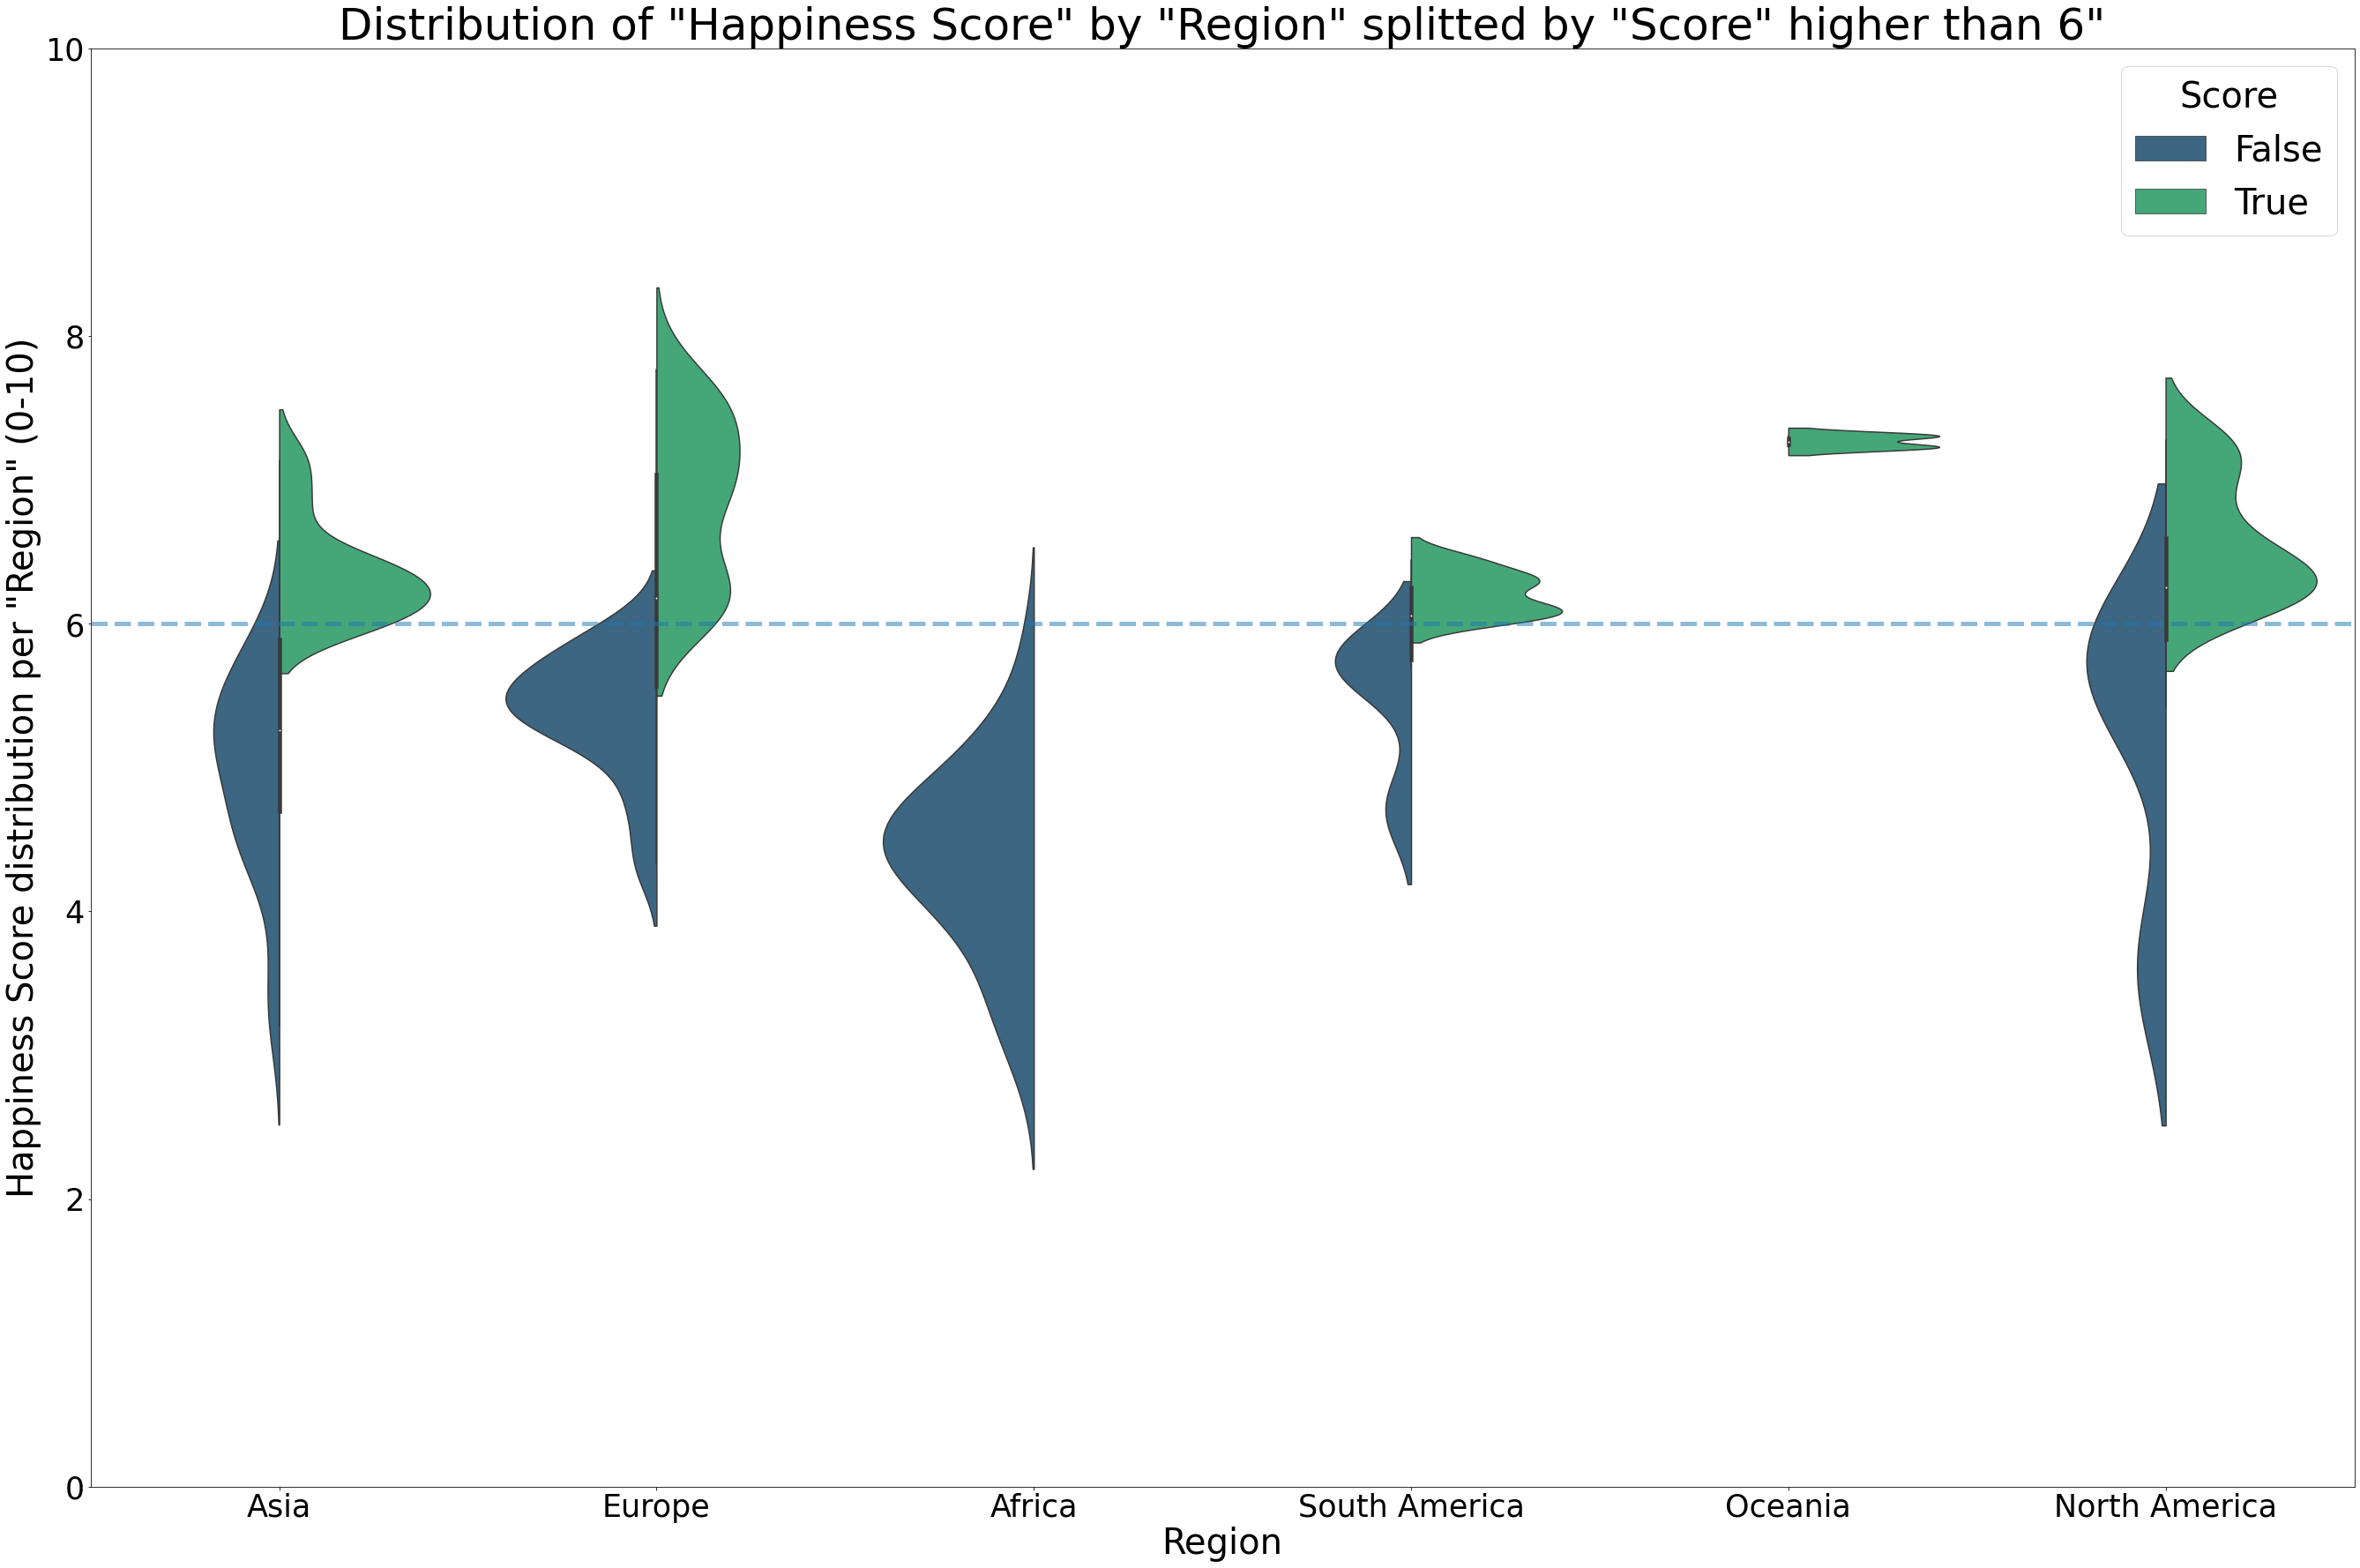

In [38]:
df_copy = world_map[[' Region','Score']].copy()
df_copy['higher_than_6'] = df_copy['Score']>=6
fig, ax = plt.subplots(figsize=(46,30))
sns.violinplot(x=' Region', y='Score', hue='higher_than_6', data=df_copy, palette="viridis",
                   split=True, bw=0.5, ax=ax)
category = 'Region'
fontsize = 40
numeric = 'Happiness Score'
binary = 'Score'
operator = 'higher than'
oper_to = 6

plt.xlabel(f'{category}', fontsize=fontsize)
plt.ylabel(f'{numeric} distribution per "{category}" (0-10)', fontsize=fontsize)
plt.xticks(fontsize=fontsize - 5)
plt.yticks(fontsize=fontsize - 5)
plt.legend(title=binary, title_fontsize=fontsize, fontsize=fontsize)
plt.title(f'Distribution of "{numeric}" by "{category}" splitted by "{binary}" {operator} {oper_to}"', 
          fontsize=fontsize + 10)
ax.axhline(6,alpha = 0.5, linestyle = '--', linewidth = 5)
plt.ylim(0,10)

### _"Confirmed: Regions with higher scores (above 6) are mostly located in the Northern Hemisphere"_
We can observe that, as the world map of happiness suggested, the regions with higher scores (above 6) are mostly located in the Northern Hemisphere, namely Europe, North America and, as we can now see, Asia.
### _"However, being in the Northen Hemisphere is NOT a guarantee of being in a happy country"_
Notice that not all places in Europe are the same, with the distribution of scores below 6 also seemingly significative, the same is valid for North-America and Asia (which both have the largest variation in scores)
### _"The safest choice is exploring OCEANIA, where happiness score is only above 6 and close to 8"_
Within our analysis, besides Oceania having the most certainty of values above 6, we also conclude that Africa has no score above 6 and that the distribution in South America is balanced, with an apparent evenness between scores above and below 6.
### _"Africa possesses the lowest scores with nothing above 6"_

## Boxplot 
In order to better understand how the data is really distributed, we'll look at the Boxplot with happiness scores per region.

(0.0, 10.0)

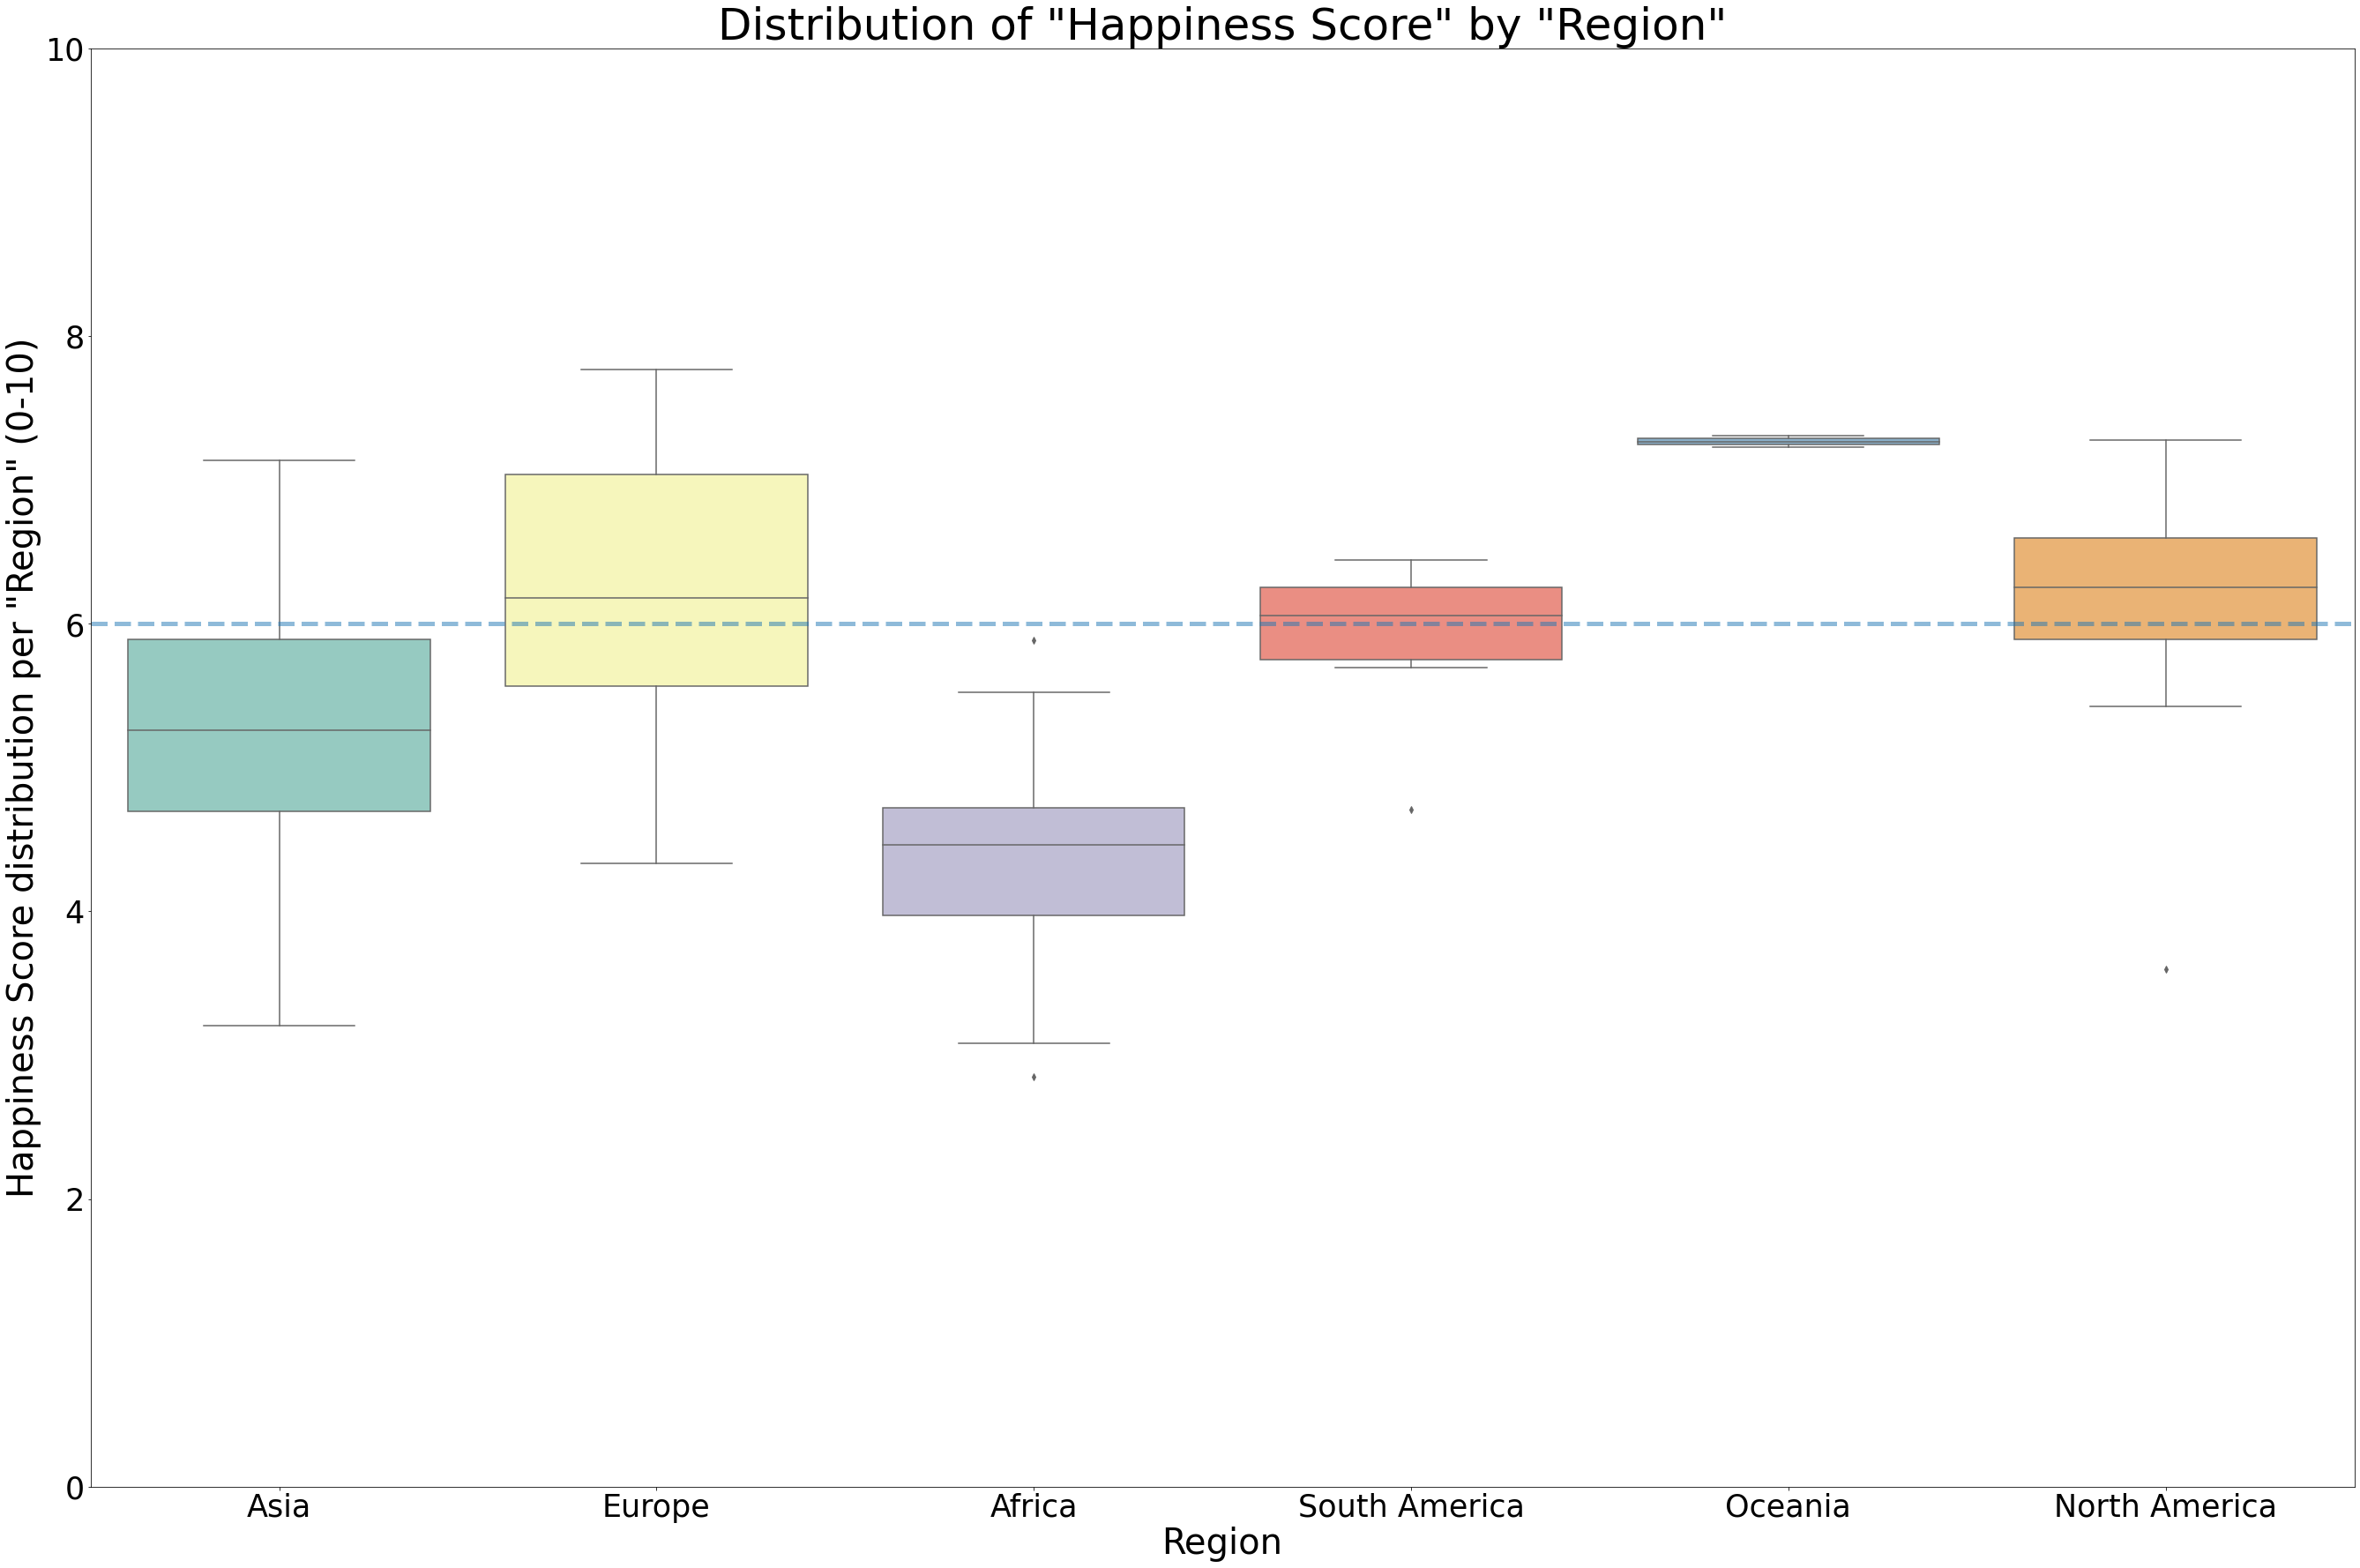

In [39]:
fig, ax = plt.subplots(figsize=(46,30))
sns.boxplot (y=world_map["Score"], x = world_map[" Region"],palette = "Set3", ax=ax).set_title("Happiness distribution is tighter in Americas and Oceania")
category = 'Region'
fontsize = 40
numeric = 'Happiness Score'
binary = 'Score'

plt.xlabel(f'{category}', fontsize=fontsize)
plt.ylabel(f'{numeric} distribution per "{category}" (0-10)', fontsize=fontsize)
plt.xticks(fontsize=fontsize - 5)
plt.yticks(fontsize=fontsize - 5)
plt.title(f'Distribution of "{numeric}" by "{category}"', 
          fontsize=fontsize + 10);
ax.axhline(6,alpha = 0.5, linestyle = '--', linewidth = 5)
plt.ylim(0,10)

### _"European distribution has 50% of its observations with a happiness score higher than 6"_
It is clear that even the European distribution has at least 50% of its total observations with a happiness score higher than 6, as well as possessing the **highest happiness score of the whole dataset.**
### _"North America has almost 75% of its distribution above 6"_
North America on the other hand seems to have a more dense distribution with 75% of its total observations basically above 6, and almost 100% from close to 6 and upwards - this shows a much wanted consistency that is evidently lacking in the largest variation of the set. 
### _"Asia has 75% of countries with a happiness level lower than 6"_
Asia has 75% of its countries with a happiness level lower than 6, having 25% its countries with a score as low as between 3 and 5.

### _"South America is again surprisingly balanced with happiness levels consistently around 6."_

By Having all of this information we are almost certain that we could already make a decision of what region to pick in order to choose a happy country to go live in.

Certainly Oceania is very attractive with a virtual certainty of a high quality of life given the high happiness scores. However, Europe still possesses the highest scores and certainly has a a wider range of cultures to choose from.

## So, what else is essential for our decision?

The **regime and stability of the life we will lead within a country is a very important factor.** We don't want to risk choosing a country that is now rating high on happiness scores but potentially, due to its political system, things could turn the other way quickly with the introduction of policies that could restrict our freedom and safety.

- # Comparing World Happiness with World Democracy
Looking at the 2019 happiness world map we posed the hypothesis, is it possible to see some similarities similar with a democracy world map?
Therefore we decided to add to our datasets the Index of Democracy, established by "The Economist Intelligence Unit" in 2019, to explore this hypothesis.

## Democracy World Map

Please note that the Democracy index is based on 5 variables: 
1. **Electoral process and pluralism**
2. **Functioning of government**
3. **Political participation**
4. **Political culture and Civil Liberties**

#### First impression

Let’s first, take a look of the 2019 democracy world map. 
It does look similar to the first happiness world map. The colorscale used is the same than the one on the happiness map, chosen on purpose.

### Comparing Happiness with Democcracy

In [40]:
fig = go.Figure(go.Choropleth(
    locations = world_map['iso_a3'],
    z = world_map['Score'],
    text = world_map['Country'],
    #zmax=10,
    #zmin=0,
    colorscale = 'magma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='lightyellow',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Score',
))

fig.update_layout(title_text='Geographical Distribution of Happiness and Democracy is Similar',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0.01,
        xref='paper',
        yref='paper',
        text='Source: The Economist Intelligence Unit & Kaggle',
        showarrow = False
    )],
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Happiness World Map",
                     method="update",
                     args=[{'z': [world_map['Score']]}]),
                dict(label="Democracy Index World Map",
                     method="update",
                     args=[{'z': [world_map['democracy index']]}])
            ]))
    ])

fig.show()

### _"It is very much noticeable that the distribution looks very similar"_

Globally we can observe obvious similarities or trends between democracy and happiness maps indeed, but differences as well. 

### _"China and Russia have an extremely low democracy score, below 3"_
Looking at China and Russia, two countries with the biggest surface area in the world, look really different (their size might biase the perception) and while their happiness score was reasonably good (above 5) their democracy score looks extremely low, below 3. 
### _"Europe, North America, Ocean and South America have a very similar color density when comparing with the Happiness World Map"_
On the regions that look very simmilar we have Europe, North America, Oceania, and even South America, with almost the same color density.

Regarding Asia and Africa, democracy scores are weaker except for South Africa which looks rather democratic.

### _"Happier countries therefore also look rather democratic"_
Happier countries seem to also be more democratic, specially in regions with the highest scores. This is very much in line with the earlier findings regarding Freedom of Choice and its strong correlation with high-scoring countries, in terms of levels of happines.

- # Correlation between happiness and democracoy across the world
### Let's further explore this relationship with a bubble plot between both variables: Happiness Score and Democracy 

In [41]:
democracy = pd.read_csv('democracy_dataset_updated.csv')
democracy.set_index('Country', inplace=True)
democracy['size'] = 10

fig = px.scatter(democracy, x="Score", y="democracy index", size = 'size', color=" Region", hover_name=democracy.index,
                labels={
                     "Score": "Happiness Score",
                 })
fig.write_image("democracy_happiness6.png", width=960,height=540)
fig.update_layout(title='Regions with more democratic nations also tend to be the happiest', )
fig.show()
democracy.reset_index(inplace=True)

- # Regime analysis

Looking at the graph, we observe an almost linear relationship between higher democracy index scores with a higher happiness score.
While, Asian and African countries appear to be mostly at the bottom left-hand corner with a democratic index under 6 on average, European, North American and Oceanian countries dominate the upper right-hand side.
If we analyze deeper, we can also observe the opposite trend– meaning that some countries with a good democracy index, still have bad happiness scores (Barhein, Botwana). And also countries with good happiness scores and bad democracy index : Russia and China are the most obivous examples showing it.

However, we can still infer conclusions from this comparison. 
Indeed, 100% of the countries with a happiness score above 7 (which is good obviously) have a democracy index above 7.5, for all cases. 
Actually, the "Economist Intelligence Unit" classify countries per level of democracy with their scores. If the democracy index is:

- Above 8         = Full democracy.
- Between 6 and 8 = Flawed Democracy. 
- Between 4 and 6 = Hybrid Regime.
- Under 4         = Authoritarian Regime. 

***Thus, according to above graph, if a country has a happiness score above 7, it is a Full Democracy***

Let's make a world map classifying these 4 regime of democracy

In [42]:
#democracy regime world map
import plotly

colorscaleS = [[0, px.colors.diverging.Geyser[0]],[0.25, px.colors.diverging.Geyser[0]], # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
        [0.25, px.colors.diverging.Geyser[2]], [0.5, px.colors.diverging.Geyser[2]],
        [0.5, px.colors.diverging.Geyser[4]], [0.75, px.colors.diverging.Geyser[4]],
        [0.75, px.colors.diverging.Geyser[6]], [1, px.colors.diverging.Geyser[6]]]

colorbarS = {"tickprefix":"",
                #"title":"Regime type",
                "tickvals":[1,2,3,4],
                #"ticktext":["1","2","3","4"]}
                "ticktext":["1 - Authoritarian Regime","2 - Hybrid Regime","3 - Flawed Democracy","4 - Full Democracy"]}
colorbarS2 = {"title":"Regime poikj"}



fig = go.Figure(go.Choropleth(
    locations = world_map["iso_a3"],
    z = world_map["regime"],
    text = world_map["Country"],
    autocolorscale=False,
    reversescale=True,
    #marker = {"line_color":"lightyellow", "line_width":1},# https://github.com/plotly/plotly.py/issues/2170
    #We were trying to add a title to the colorbar but due to the issue in the website above we were unable to do so,
    #but we were still able to implement the possibility of changing the colorbar from discrete values corresponding 
    #to government type to a continuous scale from the numerical value corresponding to the happiness score
    colorscale = colorscaleS,
    colorbar = colorbarS,
    zmax=4,
    zmin=1,
    ))

fig.update_layout(
    overwrite = True,
    title = "Authoritarian regime are more 'popular' in Africa and Asia",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular"
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref="paper",
        yref="paper",
        text="Source: The Economist Intelligence Unit",
        showarrow = False
    )],
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Democracy World Map",
                     method="update",
                     args=[{"locations":[world_map["iso_a3"]],"z": [world_map["regime"]], "text": [world_map["Country"]],
                            "autocolorscale":False,"reversescale":True, 
                            #"marker":[{"line_color":"lightyellow", "line_width":1}],
                            "colorscale":str([[0, px.colors.diverging.Geyser[0]],[0.25, px.colors.diverging.Geyser[0]], # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
                                            [0.25, px.colors.diverging.Geyser[2]], [0.5, px.colors.diverging.Geyser[2]],
                                            [0.5, px.colors.diverging.Geyser[4]], [0.75, px.colors.diverging.Geyser[4]],
                                            [0.75, px.colors.diverging.Geyser[6]], [1, px.colors.diverging.Geyser[6]]]).replace("'", '"'),
                            "colorbar": [colorbarS],
                            "zmax":4, "zmin":1}]
                    ),
                dict(label="Happiness World Map",
                     method="update",
                     args=[{"z": [world_map["Score"]],"colorbar":[colorbarS2], "colorscale":str(plotly.colors.make_colorscale(plotly.colors.diverging.Geyser)).replace("'", '"'),
                            "colorbar_title": "Happiness Score", "zmax":8, "zmin":3}])

            ]))
    ])

fig.show()

As seen by the democracy index map, this regime world map confirms that Asia and Africa are the less democratic regions compared to the others. While the _Flawed Democracy_ type dominates the Americas, we find the concentration of _Full Democracies_ mostly in West Europe and Oceania which also share some of the highest happiness scores in the world. 

# ***Conclusion***

We showed that the happiest countries, no matter the region, are necessarly democratic. 
There is not a single country with a hapiness score above 7, which is not a **Full Democracy**  (except Israel with an index of democracy = 7.86, therefore missing 0.14 points, in a scale of 0 to 10, to become a full democracy)

If Democracy and Happiness are not always 100% correlated, as China and Russia demonstrated, we can still confirm that a democractic country is more likely to be happy. And a country with an Hybrid or Authoritarian regime is more likely to be unhappy, or at least, not very happy (happiness score above 7).

Finally, we previously showed that Asia and Africa were the most unhappy countries. This current comparison with democracy lead us to conclude that these same regions, Asia and Africa, are also the less democratic.

**If we have to advise an individual to chose a country where he wants to be very happy (above 7), the individual will live in a country rather democratic than authoritarian. 
Also, this individual has more chances to be happy if he lives in Oceania, Europe, or both North and South America rather than Africa or Asia**